## Method 1

In [0]:
# Import Keras and other Deep Learning dependencies
from keras.models import Sequential
import time
from skimage.util import random_noise
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input
from keras.models import Model
import keras
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.core import Lambda, Flatten, Dense
from keras.optimizers import *
from keras.engine.topology import Layer
from keras import backend as K
from keras.regularizers import l2
import cv2
from skimage.transform import rotate, AffineTransform, warp
import os
from skimage import io, img_as_ubyte
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import numpy.random as rng
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# def get_siamese_model(input_shape):
#     """
#         Model architecture based on : http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
#     """
#     left_input = Input(input_shape)
#     right_input = Input(input_shape)
#     model = Sequential()
#     model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
#                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None), kernel_regularizer=l2(2e-4)))
#     model.add(MaxPooling2D())
#     model.add(Conv2D(128, (7,7), activation='relu',
#                      kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
#                      bias_initializer=keras.initializers.RandomNormal(mean=0.5, stddev=0.01, seed=None), kernel_regularizer=l2(2e-4)))
#     model.add(MaxPooling2D())
#     model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
#                      bias_initializer=keras.initializers.RandomNormal(mean=0.5, stddev=0.01, seed=None), kernel_regularizer=l2(2e-4)))
#     model.add(MaxPooling2D())
#     model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
#                      bias_initializer=keras.initializers.RandomNormal(mean=0.5, stddev=0.01, seed=None), kernel_regularizer=l2(2e-4)))
#     model.add(Flatten())
#     model.add(Dense(62, activation='sigmoid',
#                    kernel_regularizer=l2(1e-3),
#                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),bias_initializer=keras.initializers.RandomNormal(mean=0.5, stddev=0.01, seed=None)))
#     encoded_l = model(left_input)
#     encoded_r = model(right_input)
#     L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
#     L1_distance = L1_layer([encoded_l, encoded_r])
#     prediction = Dense(1,activation='sigmoid',bias_initializer=keras.initializers.RandomNormal(mean=0.5, stddev=0.01, seed=None))(L1_distance)
#     siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
#     return siamese_net

In [0]:

# model = get_siamese_model((384, 384, 3))
# model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 62)           26602878    input_6[0][0]                    
                                                                 input_7[0][0]                    
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 62)           0           sequential_1[1][0]         

In [0]:
# optimizer = Adam(lr = 0.0006)
# model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics = ['accuracy'])
# history = model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=32, epochs= 10,validation_split=0.15)

Train on 7480 samples, validate on 1320 samples
Epoch 1/10
7480/7480 [==============================] - 645s 86ms/step - loss: 1.1878 - accuracy: 0.5005 - val_loss: 0.8528 - val_accuracy: 0.5000
Epoch 2/10
7480/7480 [==============================] - 634s 85ms/step - loss: 0.8100 - accuracy: 0.5000 - val_loss: 0.7941 - val_accuracy: 0.5000
Epoch 3/10
7480/7480 [==============================] - 636s 85ms/step - loss: 0.8174 - accuracy: 0.5000 - val_loss: 0.8196 - val_accuracy: 0.5000
Epoch 4/10
7480/7480 [==============================] - 635s 85ms/step - loss: 0.8325 - accuracy: 0.5001 - val_loss: 0.8344 - val_accuracy: 0.5000
Epoch 5/10
7480/7480 [==============================] - 633s 85ms/step - loss: 0.8386 - accuracy: 0.5004 - val_loss: 0.8415 - val_accuracy: 0.5008
Epoch 6/10
7480/7480 [==============================] - 631s 84ms/step - loss: 0.8715 - accuracy: 0.5214 - val_loss: 0.8585 - val_accuracy: 0.5568
Epoch 7/10
7480/7480 [==============================] - 628s 84ms/step

## method 2

In [0]:
from PIL import Image
def get_size_statistics(DIR):
    heights = []
    widths = []
    for img in os.listdir(DIR): 
        path = os.path.join(DIR, img)
        data = np.array(Image.open(path)) #PIL Image library
        heights.append(data.shape[0])
        widths.append(data.shape[1])
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)  
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics("C:\\Users\\afy36\\Desktop\\cmps299\\images\\cropped")

Average Height: 173.3739524348811
Max Height: 454
Min Height: 25


Average Width: 547.6561721404304
Max Width: 647
Min Width: 174


In [0]:
from PIL import Image
def load_training_data(DIR):
    IMG_SIZE=384
    train_data = []
    train_labels = []
    i = 0
    for img in os.listdir(DIR):
        i+=1
        path = os.path.join(DIR, img)
        name = img.split("_")[0] +" "+img.split("_")[1]
        img = Image.open(path)
        img = img.convert('RGB')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append(np.array(img)) 
        train_labels.append(name)
#         #########
        #Horizontal Flipping
        flip_img = Image.open(path)
        flip_img = flip_img.convert('RGB')
        flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        flip_img = np.array(flip_img)
        flip_img = np.fliplr(flip_img)
        train_data.append(np.array(flip_img))
        train_labels.append(name)
#         ##########
        # vertical flipping
        flip_img_up = Image.open(path)
        flip_img_up = flip_img_up.convert('RGB')
        flip_img_up = flip_img_up.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        flip_img_up = np.array(flip_img_up)
        flip_img_up = np.flipud(flip_img_up)
        train_data.append(np.array(flip_img_up))
        train_labels.append(name)
        #########
        # positive rotation
        angle= random.randint(0,180)
        r1 = Image.open(path)
        r1= r1.convert('RGB')
        r1 = r1.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        r1= np.array(r1)
        r1 = rotate(r1, angle)
        r1 = img_as_ubyte(r1) 
        train_data.append(r1)
        train_labels.append(name)
        # positive rotation
        angle= random.randint(0,180)
        r1 = Image.open(path)
        r1= r1.convert('RGB')
        r1 = r1.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        r1= np.array(r1)
        r1 = rotate(r1, angle)
        r1 = img_as_ubyte(r1) 
        train_data.append(r1)
        train_labels.append(name)
        ##########
        # negative rotation
        angle= random.randint(0,180)
        r2 = Image.open(path)
        r2= r2.convert('RGB')
        r2 = r2.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        r2= np.array(r2)
        r2 = rotate(r2, -angle)
        r2 = img_as_ubyte(r2) 
        train_data.append(r2)
        train_labels.append(name)
        #####
        # negative rotation
        angle= random.randint(0,180)
        r2 = Image.open(path)
        r2= r2.convert('RGB')
        r2 = r2.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        r2= np.array(r2)
        r2 = rotate(r2, -angle)
        r2 = img_as_ubyte(r2) 
        train_data.append(r2)
        train_labels.append(name)
        # blur
        
        img2 = Image.open(path)
        img2 = img2.convert('RGB')
        img2 = img2.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        img2 = np.array(img2)
        img2 =cv2.GaussianBlur(img2, (9,9),cv2.BORDER_DEFAULT)
        train_data.append(np.array(img2))
        train_labels.append(name)
        # add noise
        if i >= 1000:
            break
        ###
    return np.asarray(train_data),np.asarray(train_labels)

In [0]:
x_train, y_train = load_training_data("/content/drive/My Drive/cropped")

In [0]:
# np.savetxt('y_train_uniquetry.txt', np.unique(y_train), fmt='%s')

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(np.shape(y_train))
print(y_train)

# np.savetxt('le_enc.txt', y_train, fmt='%s')
# np.savetxt('y_train_uniquetry.txt', np.unique(y_train), fmt='%s')

NameError: ignored

97


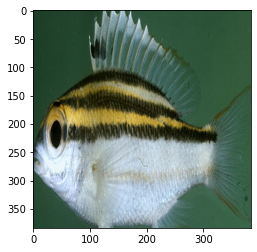

97


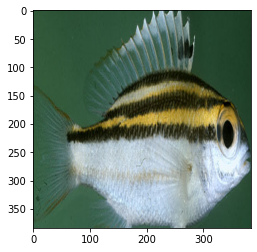

97


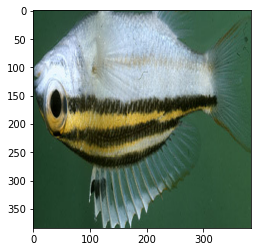

97


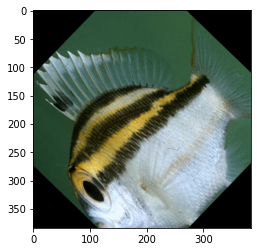

97


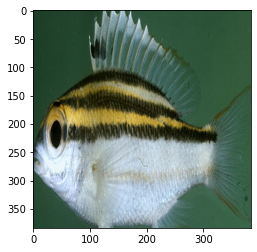

97


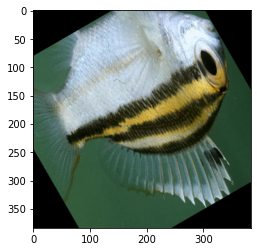

97


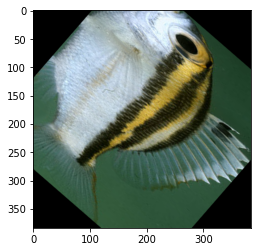

97


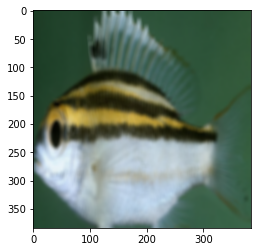

In [0]:
for i in range(32,40):
  print(y_train[i])
  plt.imshow(x_train[i])
  plt.show()
# import pickle
# pickle.dump(x_train, open("x_train", 'wb'))
# pickle.dump(y_train, open("y_train", 'wb'))


In [0]:
print(np.shape(x_train))
print(np.shape(y_train))

(8000, 384, 384, 3)
(8000,)


In [0]:
# #Image Generator
# train_datagen = ImageDataGenerator(rescale=1. / 255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')


In [0]:
# i = 0
#     for batch in train_datagen.flow(x_train,y_train,save_to_dir='C:/Users/afy36/Desktop/aug_train_data', batch_size=1,save_prefix=y_train[i]):
#         i += 1
#         if i >= 10 #for example
#             break
    

In [0]:
import random
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)


NameError: ignored

In [0]:

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as pil_image
from keras import backend as K
from keras import regularizers
from keras.engine.topology import Input
from keras.layers import Activation, Add, BatchNormalization, Concatenate, Conv2D, Dense, Flatten, GlobalMaxPooling2D, \
    Lambda, MaxPooling2D, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import Sequence
from pandas import read_csv
from scipy.ndimage import affine_transform

## Method 3 

In [0]:
def subblock(x, filter, **kwargs):
    x = BatchNormalization()(x)
    y = x
    y = Conv2D(filter, (1, 1), activation='relu', **kwargs)(y)  # Reduce the number of features to 'filter'
    y = BatchNormalization()(y)
    y = Conv2D(filter, (3, 3), activation='relu', **kwargs)(y)  # Extend the feature field
    y = BatchNormalization()(y)
    y = Conv2D(K.int_shape(x)[-1], (1, 1), **kwargs)(y)  # no activation # Restore the number of original features
    y = Add()([x, y])  # Add the bypass connection
    y = Activation('relu')(y)
    return y


def build_model(lr, l2, activation='sigmoid'):
    ##############
    # BRANCH MODEL
    ##############
    regul = regularizers.l2(l2)
    optim = Adam(lr=lr)
    kwargs = {'padding': 'same', 'kernel_regularizer': regul}

    inp = Input(shape=(384,384,3))  
    x = Conv2D(64, (9, 9), strides=2, activation='relu', **kwargs)(inp)

    x = MaxPooling2D((2, 2), strides=(2, 2))(x)  
    for _ in range(2):
        x = BatchNormalization()(x)
        x = Conv2D(64, (3, 3), activation='relu', **kwargs)(x)

    x = MaxPooling2D((2, 2), strides=(2, 2))(x)  
    x = BatchNormalization()(x)
    x = Conv2D(128, (1, 1), activation='relu', **kwargs)(x)  
    for _ in range(4):
        x = subblock(x, 64, **kwargs)

    x = MaxPooling2D((2, 2), strides=(2, 2))(x)  
    x = BatchNormalization()(x)
    x = Conv2D(256, (1, 1), activation='relu', **kwargs)(x)  
    for _ in range(4):
        x = subblock(x, 64, **kwargs)

    x = MaxPooling2D((2, 2), strides=(2, 2))(x)  
    x = BatchNormalization()(x)
    x = Conv2D(384, (1, 1), activation='relu', **kwargs)(x)  
    for _ in range(4):
        x = subblock(x, 96, **kwargs)

    x = MaxPooling2D((2, 2), strides=(2, 2))(x)  
    x = BatchNormalization()(x)
    x = Conv2D(107, (1, 1), activation='relu', **kwargs)(x)  
    for _ in range(4):
        x = subblock(x, 128, **kwargs)

    x = GlobalMaxPooling2D()(x)  
    branch_model = Model(inp, x)

    ############
    # HEAD MODEL
    ############
    mid = 32
    xa_inp = Input(shape=branch_model.output_shape[1:])
    xb_inp = Input(shape=branch_model.output_shape[1:])
    x1 = Lambda(lambda x: x[0] * x[1])([xa_inp, xb_inp])
    x2 = Lambda(lambda x: x[0] + x[1])([xa_inp, xb_inp])
    x3 = Lambda(lambda x: K.abs(x[0] - x[1]))([xa_inp, xb_inp])
    x4 = Lambda(lambda x: K.square(x))(x3)
    x = Concatenate()([x1, x2, x3, x4])
    x = Reshape((4, branch_model.output_shape[1], 1), name='reshape1')(x)

    # Per feature NN with shared weight is implemented using CONV2D with appropriate stride.
    x = Conv2D(mid, (4, 1), activation='relu', padding='valid')(x)
    x = Reshape((branch_model.output_shape[1], mid, 1))(x)
    x = Conv2D(1, (1, mid), activation='linear', padding='valid')(x)
    x = Flatten(name='flatten')(x)

    # Weighted sum implemented as a Dense layer.
    x = Dense(1, use_bias=True, activation=activation, name='weighted-average')(x)
    head_model = Model([xa_inp, xb_inp], x, name='head')

    
    # SIAMESE NEURAL NETWORK
    
    # Complete model is constructed by calling the branch model on each input image,
    # and then the head model on the resulting vectors.
    img_a = Input(shape=(384,384,3))
    img_b = Input(shape=(384,384,3))
    xa = branch_model(img_a)
    xb = branch_model(img_b)
    x = head_model([xa, xb])
    model = Model([img_a, img_b], x)
    model.compile(optim, loss='binary_crossentropy', metrics=['binary_crossentropy', 'accuracy'])
    return model, branch_model, head_model


model3s, branch_model, head_model = build_model(64e-5, 0.001)

In [0]:
history3s = model3s.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 8,validation_split=0.15)

Train on 13600 samples, validate on 2400 samples
Epoch 1/8
13600/13600 [==============================] - 253s 19ms/step - loss: 0.7148 - binary_crossentropy: 0.5941 - accuracy: 0.6815 - val_loss: 0.7672 - val_binary_crossentropy: 0.6390 - val_accuracy: 0.6921
Epoch 2/8
13600/13600 [==============================] - 254s 19ms/step - loss: 0.7129 - binary_crossentropy: 0.5924 - accuracy: 0.6802 - val_loss: 0.7313 - val_binary_crossentropy: 0.6077 - val_accuracy: 0.6538
Epoch 3/8
13600/13600 [==============================] - 254s 19ms/step - loss: 0.7148 - binary_crossentropy: 0.5937 - accuracy: 0.6814 - val_loss: 0.7447 - val_binary_crossentropy: 0.6281 - val_accuracy: 0.6529
Epoch 4/8
13600/13600 [==============================] - 252s 19ms/step - loss: 0.7457 - binary_crossentropy: 0.6071 - accuracy: 0.6642 - val_loss: 0.7613 - val_binary_crossentropy: 0.6076 - val_accuracy: 0.6858
Epoch 5/8
13600/13600 [==============================] - 249s 18ms/step - loss: 0.7160 - binary_crossen

In [0]:
accuracy = model3s.evaluate([pairs_test[:,0], pairs_test[:,1]], labels_test[:])


1904/1904 [==============================] - 10s 5ms/step


In [0]:
print('Test loss: ', accuracy[0])
print('Test accuracy: ', accuracy[2])

Test loss:  0.8050015653882708
Test accuracy:  0.6244747638702393


In [0]:
model3s.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 107)          2123719     input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
head (Model)                    (None, 1)            301         model_1[1][0]              

In [0]:
# from keras.models import load_model
# model1s = load_model('/content/fyp7colab_0pt0001.h5')

In [0]:
history1s = model1s.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=32, epochs= 5,validation_split=0.15)

Train on 7480 samples, validate on 1320 samples
Epoch 1/5
7480/7480 [==============================] - 3323s 444ms/step - loss: 1.3239 - binary_crossentropy: 0.7140 - accuracy: 0.4976 - val_loss: 1.3027 - val_binary_crossentropy: 0.6926 - val_accuracy: 0.5189
Epoch 2/5
7480/7480 [==============================] - 3330s 445ms/step - loss: 1.3044 - binary_crossentropy: 0.6942 - accuracy: 0.5132 - val_loss: 1.3040 - val_binary_crossentropy: 0.6940 - val_accuracy: 0.5106
Epoch 3/5
7480/7480 [==============================] - 3313s 443ms/step - loss: 1.2777 - binary_crossentropy: 0.6673 - accuracy: 0.5810 - val_loss: 1.3323 - val_binary_crossentropy: 0.7206 - val_accuracy: 0.5530
Epoch 4/5
7480/7480 [==============================] - 3340s 446ms/step - loss: 1.2240 - binary_crossentropy: 0.6117 - accuracy: 0.6531 - val_loss: 1.2222 - val_binary_crossentropy: 0.6101 - val_accuracy: 0.6652
Epoch 5/5
7480/7480 [==============================] - 3245s 434ms/step - loss: 1.1761 - binary_crossent

In [0]:
model1s.save("fyp5_bestcand_colab_0pt0001_neg4lr_128.h5")

after 5 epochs


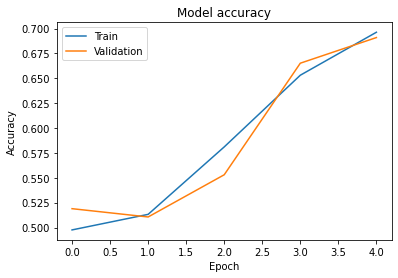

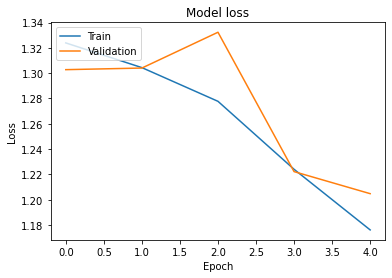

In [0]:
print("after 5 epochs")
# Plot training & validation accuracy values
plt.plot(history1s.history['accuracy'])
plt.plot(history1s.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1s.history['loss'])
plt.plot(history1s.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
history1s = model1s.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=32, epochs= 5,validation_split=0.15)

Train on 7480 samples, validate on 1320 samples
Epoch 1/5
7480/7480 [==============================] - 3371s 451ms/step - loss: 1.1391 - binary_crossentropy: 0.5312 - accuracy: 0.7259 - val_loss: 1.2696 - val_binary_crossentropy: 0.6635 - val_accuracy: 0.6477
Epoch 2/5
7480/7480 [==============================] - 3282s 439ms/step - loss: 1.1208 - binary_crossentropy: 0.5167 - accuracy: 0.7396 - val_loss: 1.2169 - val_binary_crossentropy: 0.6151 - val_accuracy: 0.6826
Epoch 3/5
7480/7480 [==============================] - 3254s 435ms/step - loss: 1.0952 - binary_crossentropy: 0.4957 - accuracy: 0.7532 - val_loss: 1.1621 - val_binary_crossentropy: 0.5652 - val_accuracy: 0.7015
Epoch 4/5
7480/7480 [==============================] - 3475s 465ms/step - loss: 1.0736 - binary_crossentropy: 0.4794 - accuracy: 0.7598 - val_loss: 1.2075 - val_binary_crossentropy: 0.6161 - val_accuracy: 0.7008
Epoch 5/5
7480/7480 [==============================] - 3276s 438ms/step - loss: 1.0586 - binary_crossent

In [0]:
def plot_model_stat(history1s):    
    # Plot training & validation accuracy values
    plt.plot(history1s.history['accuracy'])
    plt.plot(history1s.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history1s.history['loss'])
    plt.plot(history1s.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [0]:
# inputs, targets = make_oneshot_task(N,s)
#         probs = model.predict(inputs)
#         if np.argmax(probs) == np.argmax(targets):
#             n_correct+=1
#     percent_correct = (100.0 * n_correct / k)

In [0]:
# history2s = model2s.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=32, epochs= 13,validation_split=0.15)

Train on 7480 samples, validate on 1320 samples
Epoch 1/13
7480/7480 [==============================] - 404s 54ms/step - loss: 24.6552 - binary_crossentropy: 0.7943 - accuracy: 0.5183 - val_loss: 23.8154 - val_binary_crossentropy: 0.6968 - val_accuracy: 0.5098
Epoch 2/13
7480/7480 [==============================] - 364s 49ms/step - loss: 22.8179 - binary_crossentropy: 0.6968 - accuracy: 0.4964 - val_loss: 21.7523 - val_binary_crossentropy: 0.7065 - val_accuracy: 0.4803
Epoch 3/13
7480/7480 [==============================] - 364s 49ms/step - loss: 20.6084 - binary_crossentropy: 0.6985 - accuracy: 0.5076 - val_loss: 19.4501 - val_binary_crossentropy: 0.6988 - val_accuracy: 0.5159
Epoch 4/13
7480/7480 [==============================] - 364s 49ms/step - loss: 18.3026 - binary_crossentropy: 0.6940 - accuracy: 0.5259 - val_loss: 17.1798 - val_binary_crossentropy: 0.7097 - val_accuracy: 0.5500
Epoch 5/13
7480/7480 [==============================] - 365s 49ms/step - loss: 16.0452 - binary_cros

In [0]:
model2s.save("fyp13_bestcand_colab_0pt004_neg5lr_128.h5")

after 13 epochs


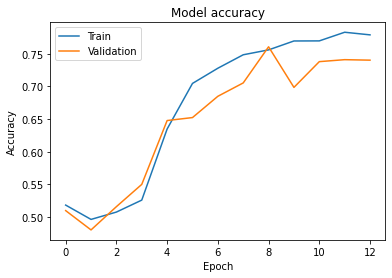

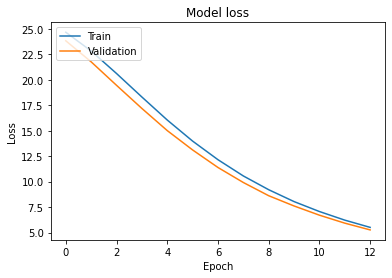

In [0]:
# print("after 13 epochs")
# plot_model_stat(history2s)

BEST MODEL

In [0]:
history3s = model3s.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=32, epochs= 8,validation_split=0.15)

Train on 13600 samples, validate on 2400 samples
Epoch 1/8
13600/13600 [==============================] - 240s 18ms/step - loss: 3.6576 - binary_crossentropy: 0.7072 - accuracy: 0.5046 - val_loss: 3.5939 - val_binary_crossentropy: 0.6947 - val_accuracy: 0.5050
Epoch 2/8
13600/13600 [==============================] - 205s 15ms/step - loss: 3.4777 - binary_crossentropy: 0.6554 - accuracy: 0.5947 - val_loss: 3.3140 - val_binary_crossentropy: 0.5788 - val_accuracy: 0.6883
Epoch 3/8
13600/13600 [==============================] - 205s 15ms/step - loss: 3.2138 - binary_crossentropy: 0.5831 - accuracy: 0.6913 - val_loss: 3.0494 - val_binary_crossentropy: 0.5305 - val_accuracy: 0.7354
Epoch 4/8
13600/13600 [==============================] - 205s 15ms/step - loss: 2.9566 - binary_crossentropy: 0.5579 - accuracy: 0.7081 - val_loss: 2.8092 - val_binary_crossentropy: 0.5345 - val_accuracy: 0.7337
Epoch 5/8
13600/13600 [==============================] - 205s 15ms/step - loss: 2.6881 - binary_crossen

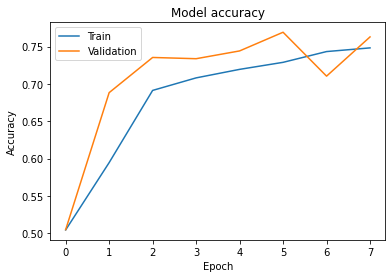

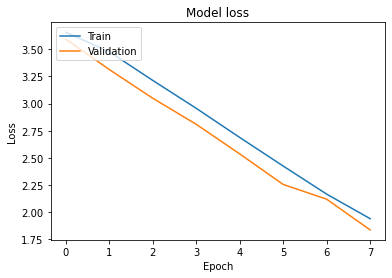

In [0]:
plot_model_stat(history3s)

In [0]:
model3s.save("fyp8_best_final_neg5lr_128.h5")

In [0]:
from PIL import Image
def load_testing_data(DIR):
    IMG_SIZE=384
    train_data = []
    train_labels = []
    i = 0
    for img in os.listdir(DIR):
        i+=1
        path = os.path.join(DIR, img)
        name = img.split("_")[0] +" "+img.split("_")[1]
        img = Image.open(path)
        img = img.convert('RGB')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append(np.array(img)) 
        train_labels.append(name)
    return np.asarray(train_data),np.asarray(train_labels)

In [0]:
#loads testing data
x_test, y_test = load_testing_data("/content/drive/My Drive/y_test_rita")

In [0]:
#encodes string data/names to ints
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
print(np.shape(y_test_enc))
print(y_test_enc)

(967,)
[ 56  56  56  56  56  55  55  55  58  58  58  92  92  92  92  92  92   7
   5   7   5   7   7   5   7  59  65  59   6  65  59  59  65  65   6  59
  59   6   6   6  66  66  78  66  66  66  78  78  66  66  78  11  11  11
   4  10   4   9   4   4   4   4   8   8   8   9   4   4   8   4   4   4
  11   4   8   9   4   4   4   8  14  13  13  13  13  13  13  10  13  13
  13  14  13  10  13  10  13  13  14  15  15  15  15  16  15  14  14  15
  14  14  15  15  15  14  14  15  14  14  16  15  15  15  14  15  17  16
  16  17  16  16  17  16  16  18  18  18  18  18  19  18  18  18  19  17
  18  19  18  19  18  19  17  19  19  18  19  18  19  18  20  20  20  20
  21  20  22  20  20  22  21  20  21  20  21  22  21  21  21  21  20  20
  21  21  22  21  22  20  20  21  21  21  20  22  21  22  22  23  23  23
  24  22  23  22  23  24  22  23  23  24  24  23  23  22  24  22  22  24
  22  24  24  22  22  23  22  23  24  24  24  24  26  27  28  28  25  25
  25  28  27  28  25  28  27  28  25  26  26

In [0]:
pairs_test, labels_test = make_pairs(x_test,y_test_enc)

In [0]:
accuracy = model3s.evaluate([pairs_test[:,0], pairs_test[:,1]], labels_test[:])


1904/1904 [==============================] - 11s 6ms/step


In [0]:
print('Test loss: ', accuracy[0])
print('Test accuracy: ', accuracy[2])

Test loss:  1.9839465477887321
Test accuracy:  0.6633403301239014


In [0]:
from sklearn.metrics import f1_score
y_pred_f = modelb.predict([pairs_test[:,0], pairs_test[:,1]])
fMeasure = f1_score(labels_test[:], y_pred_f.round(), average="macro")
print("f-measure:", fMeasure)
# print(y_pred_f)

f-measure: 0.6552050069123305


## Below is code for 1 image recognition for interface

In [0]:
def load_testing_data2(DIR):
    IMG_SIZE=384
    train_data = []
    train_labels = []
    i = 0
    for img in os.listdir(DIR):
        i+=1
        path = os.path.join(DIR, img)
        # name = img.split("_")[0] +" "+img.split("_")[1]
        img = Image.open(path)
        img = img.convert('RGB')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append(np.array(img)) 
        # train_labels.append(name)
    return np.asarray(train_data)
img1 = load_testing_data2("/content/drive/My Drive/interface_test")
print(img1.shape)

(6, 384, 384, 3)


In [0]:
from keras.models import load_model
modelb = load_model('/content/drive/My Drive/fyp8_best_final_neg5lr_128.h5')

In [0]:
import random
# custom make pairs for prediction on 1 image where it is the 1st index in all pairs
# the second is any image for the 104 other classes 
def make_pairs_test(x, y,image1):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []
    predict_labels = []
    #xp = x[0]
    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        predict_labels.append(y[idx1])
        idx2 = random.choice(digit_indices[label1])
        # x2 = x[idx2]
        
        # pairs += [[x1, x2]]
        # labels += [1]
    
        # add a not matching example
        # label2 = random.randint(0, num_classes-1)
        # while label2 == label1:
        #     label2 = random.randint(0, num_classes-1)
        # predict_labels.append(y[label2])
        # idx2 = random.choice(digit_indices[label2])
        # x2 = x[idx2]
        
        pairs += [[np.array(image1), x1]]
        labels += [0]

    return np.array(pairs), np.array(labels), predict_labels

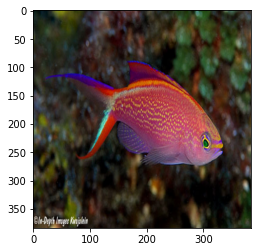

In [0]:
plt.imshow(img1[5])

In [0]:
pairs_test, labels_test, predict_labels = make_pairs_test(x_test, y_test_enc,img1[5])

In [0]:
y_pred = modelb.predict([pairs_test[:,0], pairs_test[:,1]])

In [0]:
print(np.shape(predict_labels))
best_res = predict_labels[np.argmax(y_pred)]
print(le.inverse_transform([best_res]))

(967,)
['pseudanthias squamipinnis']


In [0]:
np.savetxt('predict_labels_try.txt', predict_labels, fmt='%s')

In [0]:
# print(le.inverse_transform([predict_labels[0]]))

['pseudorhombus argus']
